# 1. Introdução

# 2. Configurações

## 2.1. Importações

In [1]:
import os
import json

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import altair as alt

## 2.2. Carregamento dos dados

In [3]:
!rm -rf *

In [4]:
!wget https://github.com/vast-challenge/2023-data/raw/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip

--2023-11-28 18:15:49--  https://github.com/vast-challenge/2023-data/raw/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vast-challenge/2023-data/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip [following]
--2023-11-28 18:15:49--  https://raw.githubusercontent.com/vast-challenge/2023-data/800887b8fcadad4ac526d29983948277a6e423e2/MC2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59914171 (57M) [application/zip]
Saving to: ‘MC2.zip’

MC2.zip             100%[===================>]  57.14M   221MB/s    in 0.3s    

2023-11-28 18:15:50 (221 MB/s

In [5]:
!unzip MC2.zip

Archive:  MC2.zip
   creating: MC2/
   creating: MC2/bundles/
  inflating: MC2/bundles/carp.json   
  inflating: MC2/bundles/catfish.json  
  inflating: MC2/bundles/chub_mackerel.json  
  inflating: MC2/bundles/cod2.json   
  inflating: MC2/bundles/herring.json  
  inflating: MC2/bundles/lichen.json  
  inflating: MC2/bundles/mackerel.json  
  inflating: MC2/bundles/pollock.json  
  inflating: MC2/bundles/salmon.json  
  inflating: MC2/bundles/salmon_wgl.json  
  inflating: MC2/bundles/shark.json  
  inflating: MC2/bundles/tuna.json   
  inflating: MC2/mc2_challenge_graph.zip  
  inflating: MC2/VAST 2023 Data Notes.pdf  
  inflating: MC2/VAST Challenge 2023 C2 Answer Sheet.htm  
   creating: MC2/VAST Challenge 2023 C2 Answer Sheet_files/
  inflating: MC2/VAST Challenge 2023 C2 Answer Sheet_files/colorschememapping.xml  
  inflating: MC2/VAST Challenge 2023 C2 Answer Sheet_files/filelist.xml  
  inflating: MC2/VAST Challenge 2023 C2 Answer Sheet_files/themedata.thmx  


In [6]:
!unzip MC2/mc2_challenge_graph.zip

Archive:  MC2/mc2_challenge_graph.zip
  inflating: mc2_challenge_graph.json  
  inflating: __MACOSX/._mc2_challenge_graph.json  


In [ ]:
with open("mc2_challenge_graph.json", "r") as f:
    data = json.load(f)

In [9]:
bundles = {}

In [10]:
for dirpath, dnames, fnames in os.walk("./MC2/bundles/"):
    for filename in fnames:
        print(filename)
        with open(f"./MC2/bundles/{filename}", "r") as f:
            bundles[filename.split('.')[0]] = json.load(f)

salmon.json
carp.json
tuna.json
mackerel.json
salmon_wgl.json
cod2.json
pollock.json
shark.json
lichen.json
catfish.json
herring.json
chub_mackerel.json


In [19]:
salmon_nodes = pd.DataFrame(bundles["salmon"]["nodes"])
salmon_nodes

,shpcountry,dataset,id,rcvcountry
0,Nalakond,MC2,Samaka Chart ОАО Delivery,NaN
1,NaN,MC2,-2,Azurionix
2,Marebak,MC2,Kallianassa Ltd. Corporation Oceanography,NaN
3,NaN,MC2,Punjab s A/S Marine,Azurionix
4,NaN,MC2,Caracola del Sol Services,Azurionix
5,NaN,MC2,Pao gan LC Freight,Azurionix
6,NaN,MC2,Coral Cove BV Delivery,Azurionix
7,NaN,MC2,Marine Mermaids SRL United,Oceanus


In [20]:
salmon_links = pd.DataFrame(bundles["salmon"]["links"])
salmon_links

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,generated_by,dataset,source,target
0,2034-10-23,30619,94150.0,0.0,20980,salmon,MC2,Samaka Chart ОАО Delivery,-2
1,2034-10-23,30619,94150.0,0.0,20980,salmon,MC2,Samaka Chart ОАО Delivery,-2
2,2034-10-14,30619,94170.0,0.0,20980,salmon,MC2,Samaka Chart ОАО Delivery,-2
3,2034-10-14,30619,94170.0,0.0,20980,salmon,MC2,Samaka Chart ОАО Delivery,-2
4,2034-10-14,30619,94170.0,0.0,20980,salmon,MC2,Samaka Chart ОАО Delivery,-2
...,...,...,...,...,...,...,...,...,...
127,2034-08-29,392690,NaN,0.0,3560,salmon,MC2,Kallianassa Ltd. Corporation Oceanography,Marine Mermaids SRL United
128,2034-08-29,392690,NaN,0.0,3560,salmon,MC2,Kallianassa Ltd. Corporation Oceanography,Marine Mermaids SRL United
129,2034-08-29,392690,NaN,0.0,3560,salmon,MC2,Kallianassa Ltd. Corporation Oceanography,Marine Mermaids SRL United
130,2034-08-29,392690,NaN,0.0,3560,salmon,MC2,Kallianassa Ltd. Corporation Oceanography,Marine Mermaids SRL United


In [ ]:
salmon_links.merge(salmon_nodes, left_on="source", right_on="id", how="inner")

# 3. Análise exploratória dos dados

In [8]:
data.keys()

dict_keys(['directed', 'multigraph', 'graph', 'nodes', 'links'])

In [9]:
data["nodes"][0].keys()

dict_keys(['shpcountry', 'rcvcountry', 'dataset', 'id'])

In [10]:
len(data["nodes"])

34576

In [11]:
data["links"][0].keys()

dict_keys(['arrivaldate', 'hscode', 'valueofgoods_omu', 'volumeteu', 'weightkg', 'dataset', 'source', 'target'])

In [12]:
len(data["links"])

5464378

In [13]:
df = pd.DataFrame(data["links"])
df

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd
0,2034-02-12,630630,141015.0,0.0,4780,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
1,2034-03-13,630630,141015.0,0.0,6125,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
2,2028-02-07,470710,NaN,0.0,10855,MC2,AquaDelight Inc and Son's,-15045,NaN
3,2028-02-23,470710,NaN,0.0,11250,MC2,AquaDelight Inc and Son's,-15045,NaN
4,2028-09-11,470710,NaN,0.0,11165,MC2,AquaDelight Inc and Son's,-15045,NaN
...,...,...,...,...,...,...,...,...,...
5464373,2034-12-25,304740,NaN,0.0,945,MC2,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,3005.0
5464374,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464375,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464376,2034-12-28,160414,NaN,0.0,6710,MC2,Costa del Mar NV,Selous Game Reserve Kga,50505.0


In [37]:
df[df["hscode"] == "850151"]

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd
362601,2034-06-24,850151,NaN,0.0,11905,MC2,Makumba Ltd. Liability Co,Sailors and Surfers Incorporated Enterprises,NaN
362960,2034-07-08,850151,NaN,0.0,11935,MC2,Makumba Ltd. Liability Co,Dutch Ltd. Liability Co Consultants,NaN
362970,2034-08-12,850151,NaN,0.0,11930,MC2,Makumba Ltd. Liability Co,Dutch Ltd. Liability Co Consultants,NaN
362975,2034-08-19,850151,NaN,0.0,10565,MC2,Makumba Ltd. Liability Co,Dutch Ltd. Liability Co Consultants,NaN
362979,2034-09-06,850151,NaN,0.0,9240,MC2,Makumba Ltd. Liability Co,Dutch Ltd. Liability Co Consultants,NaN
...,...,...,...,...,...,...,...,...,...
4521645,2029-01-09,850151,NaN,0.0,15000,MC2,Mar de la Aventura Transport,Vespuci Sagl Marine sanctuary,NaN
4706255,2028-09-26,850151,NaN,0.0,21625,MC2,Niger Bend Plc Marine biology,-1959,NaN
4706287,2028-09-26,850151,NaN,0.0,1745,MC2,Niger Bend Plc Marine biology,Lake Malawi A/S Worldwide,NaN
4772606,2034-02-23,850151,NaN,0.0,11355,MC2,Mar de la Vida BV,Pao gan SE Seal,NaN


In [15]:
_["source"].value_counts()

Blue Horizon Family &                        7511
Manipur  Market Corporation Cargo            5376
Playa de Arena OJSC Express                  4928
Balkan Cat ОАО Transport                     4606
Wave Watchers Ltd. Liability Co              4574
                                             ... 
Tshikele Ltd. Liability Co                      1
Playa de Arena SRL                              1
Ob River Surfboard AG Marine conservation       1
Lake Nakuru  Marine Flounder                    1
Yu er he  GmbH                                  1
Name: source, Length: 1100, dtype: int64

In [16]:
df["hscode"].value_counts()

306170    156886
950300    126629
870899    110625
940360     91665
611020     91495
           ...  
501000         1
500400         1
901290         1
380910         1
302490         1
Name: hscode, Length: 4761, dtype: int64

In [17]:
df_value = df[["arrivaldate", "valueofgoods_omu", "valueofgoodsusd"]]
df_value = df_value.loc[df_value["valueofgoodsusd"].notna()]
df_value

,arrivaldate,valueofgoods_omu,valueofgoodsusd
6,2028-04-12,NaN,87110.0
7,2028-06-04,NaN,188140.0
9,2028-09-08,NaN,221110.0
10,2029-02-04,NaN,58645.0
11,2029-02-04,NaN,58645.0
...,...,...,...
5464366,2034-12-13,NaN,296285.0
5464372,2034-12-25,NaN,3000.0
5464373,2034-12-25,NaN,3005.0
5464376,2034-12-28,NaN,50505.0


In [18]:
df_value.dtypes

arrivaldate          object
valueofgoods_omu    float64
valueofgoodsusd     float64
dtype: object

In [19]:
df_value["arrivaldate"] = pd.to_datetime(df_value["arrivaldate"], format="%Y-%m-%d")
df_value

,arrivaldate,valueofgoods_omu,valueofgoodsusd
6,2028-04-12,NaN,87110.0
7,2028-06-04,NaN,188140.0
9,2028-09-08,NaN,221110.0
10,2029-02-04,NaN,58645.0
11,2029-02-04,NaN,58645.0
...,...,...,...
5464366,2034-12-13,NaN,296285.0
5464372,2034-12-25,NaN,3000.0
5464373,2034-12-25,NaN,3005.0
5464376,2034-12-28,NaN,50505.0


In [20]:
df_value_202804 = df_value[(df_value["arrivaldate"].dt.year == 2028) & (df_value["arrivaldate"].dt.month == 4)]
df_value_202804

,arrivaldate,valueofgoods_omu,valueofgoodsusd
6,2028-04-12,NaN,87110.0
4537,2028-04-04,NaN,4205.0
4544,2028-04-08,NaN,15215.0
4547,2028-04-08,NaN,140.0
4555,2028-04-14,NaN,79545.0
...,...,...,...
5211117,2028-04-29,NaN,3005.0
5211304,2028-04-29,NaN,1900.0
5211425,2028-04-30,NaN,1900.0
5211469,2028-04-30,NaN,82260.0


In [21]:
df_value_202804 = df_value_202804[df_value_202804["valueofgoodsusd"] < 1500000]

In [22]:
px.violin(df_value_202804["valueofgoodsusd"])

In [23]:
px.scatter(
    x=df_value_202804["arrivaldate"],
    y=df_value_202804["valueofgoodsusd"]
)

## 3.1. Tratamento de outliers

## 3.2. Análise de correlações

In [24]:
df

,arrivaldate,hscode,valueofgoods_omu,volumeteu,weightkg,dataset,source,target,valueofgoodsusd
0,2034-02-12,630630,141015.0,0.0,4780,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
1,2034-03-13,630630,141015.0,0.0,6125,MC2,AquaDelight Inc and Son's,BaringoAmerica Marine Ges.m.b.H.,NaN
2,2028-02-07,470710,NaN,0.0,10855,MC2,AquaDelight Inc and Son's,-15045,NaN
3,2028-02-23,470710,NaN,0.0,11250,MC2,AquaDelight Inc and Son's,-15045,NaN
4,2028-09-11,470710,NaN,0.0,11165,MC2,AquaDelight Inc and Son's,-15045,NaN
...,...,...,...,...,...,...,...,...,...
5464373,2034-12-25,304740,NaN,0.0,945,MC2,Mar del Oeste Ltd. Corporation,Karnataka Ltd. Corporation Manatee,3005.0
5464374,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464375,2034-12-26,845430,NaN,0.0,2170,MC2,Playa del Mar OJSC,Caracola de Coral CJSC,NaN
5464376,2034-12-28,160414,NaN,0.0,6710,MC2,Costa del Mar NV,Selous Game Reserve Kga,50505.0


In [25]:
df.corr(method="pearson")

<ipython-input-25-430a9a400b0e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.207118,0.004395,NaN
volumeteu,0.207118,1.000000,0.290822,0.009855
weightkg,0.004395,0.290822,1.000000,0.018498
valueofgoodsusd,NaN,0.009855,0.018498,1.000000


In [26]:
df.corr(method="kendall")

<ipython-input-26-26198ef9f927>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.255698,0.299549,NaN
volumeteu,0.255698,1.000000,0.373300,0.283400
weightkg,0.299549,0.373300,1.000000,0.460443
valueofgoodsusd,NaN,0.283400,0.460443,1.000000


In [27]:
df.corr(method="spearman")

<ipython-input-27-08fea2b5c1d6>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,valueofgoods_omu,volumeteu,weightkg,valueofgoodsusd
valueofgoods_omu,1.000000,0.396172,0.454619,NaN
volumeteu,0.396172,1.000000,0.458540,0.348004
weightkg,0.454619,0.458540,1.000000,0.624436
valueofgoodsusd,NaN,0.348004,0.624436,1.000000


array([[<Axes: xlabel='weightkg', ylabel='weightkg'>,
        <Axes: xlabel='volumeteu', ylabel='weightkg'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='weightkg'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='weightkg'>],
       [<Axes: xlabel='weightkg', ylabel='volumeteu'>,
        <Axes: xlabel='volumeteu', ylabel='volumeteu'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='volumeteu'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='volumeteu'>],
       [<Axes: xlabel='weightkg', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='volumeteu', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='valueofgoods_omu'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='valueofgoods_omu'>],
       [<Axes: xlabel='weightkg', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='volumeteu', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='valueofgoods_omu', ylabel='valueofgoodsusd'>,
        <Axes: xlabel='valueofgoodsusd', ylabel='valueofgoodsusd'>]],
   

Error in callback <function _draw_all_if_interactive at 0x7f5d070f2050> (for post_execute):


KeyboardInterrupt: ignored

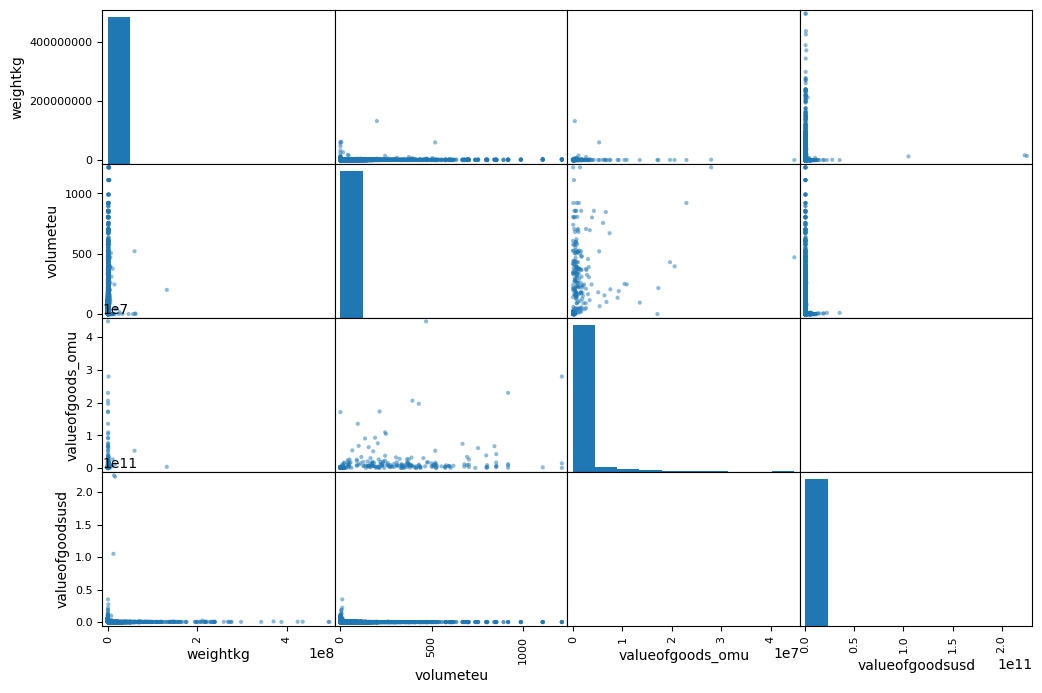

In [28]:
pd.plotting.scatter_matrix(
    df[["weightkg", "volumeteu", "valueofgoods_omu", "valueofgoodsusd"]],
    figsize = (12, 8)
)

### Análise de regressão

# 4. Descoberta de padrões